<a href="https://colab.research.google.com/github/RasyaAkbar/learning-py-torch/blob/main/04.%20Computer%20vision%20with%20FashionMNIST%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch

* `torchvision` - Contains datasets, model architectures and image transformations often used for computer vision problems.
* `torchvision.datasets` - Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.
* `torchvision.models` - This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.
* `torchvision.transforms` - Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [1]:
import torch
from torch import nn # nn contains all of building blocks of neural networks from torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn # great for machine learning purposes
# import torchvision
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Getting a dataset

We'll be using FashionMNIST from torch.datasets:
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want to train dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transforming data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # do we want to train dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transforming data
    target_transform=None # how do we want to transform the labels/targets
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx , train_data.targets

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 tensor([9, 0, 0,  ..., 3, 0, 5]))

In [8]:
print(image.shape) # [color_channels, height, width] Note: color channel only in shape of 1 becuz its black and white image
class_names[label], train_data[torch.randint(0,len(train_data), size=[1]).item()]

torch.Size([1, 28, 28])


('Ankle boot',
 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.3333, 0.6745, 0.5020, 0.2471, 0.1804, 0.2471,
            0.4902, 0.7373, 0.3373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
            0.4431, 0.8706, 0.9922, 0.8863, 1.0000, 1.0000, 0.7294, 0.9294,
            1.0000, 0.8980, 0.9882, 0.8471, 0.4000, 0.0000, 0.0000, 0.0000,
            0.0078, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.6275, 0.8353,
            0.9137, 0.8588, 0.8314, 0.8392, 0.7961, 0.8824, 0.8314, 0.8549,
            0.8275, 0.8196, 0.8353, 0.8706, 0.9137, 0.8392, 0.4980, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7961, 0.9608, 0.8431,
            0.8275, 0.8353, 0.8549, 0.8510, 0.8667, 0.8510, 0.8824, 0.8667,
            0.

### 1.2 Visualizing our data

Text(0.5, 1.0, '9')

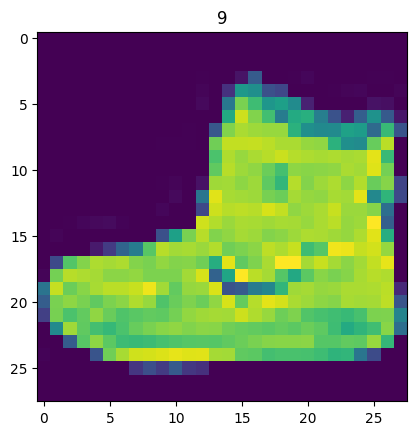

In [9]:
plt.imshow(image.squeeze()) # this method only works on b & w image, plt works in [height, width, color_channels] format
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

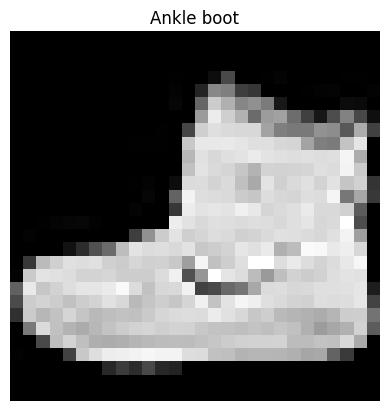

In [10]:
plt.imshow(image.squeeze(), cmap="gray") # this method only works on b & w image, plt works in [height, width, color_channels] format
plt.title(class_names[label])
plt.axis(False)

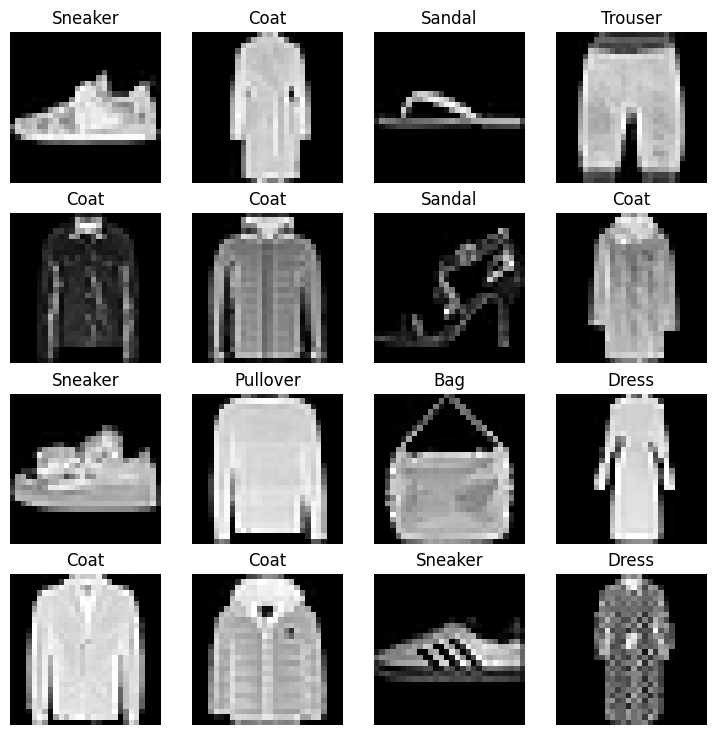

In [11]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray") # this method only works on b & w image, plt works in [height, width, color_channels] format
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

we want to turn it into Python iterable using DataLoader

More specifically we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, we don't want the hardware to look at 60k images in one go so we break it down into 32 images at a time (batch size 32)
2. It gives our neural network more chances to update its gradient per epoch. (Look up andrew ng minibatches)

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [12]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True # We want to prevent order and let the machine train on various type of data
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False # When evaluating a model, generally its better to have a specific order or atleast its ok to have order for test purpose
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79046850ffd0>,
 <torch.utils.data.dataloader.DataLoader at 0x79046850efe0>)

In [13]:
len(train_dataloader), len(test_dataloader) # length of data divided by BATCH_SIZE

(1875, 313)

In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # get first batch
test_features_batch, test_labels_batch = next(iter(test_dataloader))
train_features_batch[0], test_labels_batch , train_labels_batch.shape, test_features_batch.argmax(dim=1)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1922, 0.6627, 0.5529, 0.2039, 0.1647, 0.1529, 0.2627,
           0.6784, 0.5765, 0.1922, 0.0667, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1686, 0.4667,
           0.5765, 0.5608, 0.5529, 0.7059, 0.8157, 0.9922, 1.0000, 0.9098,
           0.7373, 0.5216, 0.5529, 0.6118, 0.5765, 0.3255, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.2824, 0.5804, 0.5255,
           0.4510, 0.4471, 0.4392, 0.3922, 0.4078, 0.5059, 0.5059, 0.3961,
           0.3451, 0.4431, 0.4431, 0.4510, 0.5020, 0.5804, 0.4392, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.5137, 0.4941, 0.4706,
           0.4706, 0.4706, 0.4706, 0.4980, 0.4706, 0.4431, 0.4392, 0.4549,
           0.4667, 0.4392, 0.4549, 0.4627, 

(-0.5, 27.5, 27.5, -0.5)

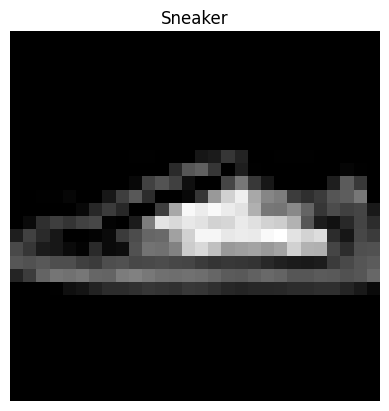

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray") # this method only works on b & w image, plt works in [height, width, color_channels] format
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
print(x.shape)

# Flatten the sample
output = flatten_model(x) # Perform forward pass

output.shape

torch.Size([1, 28, 28])


torch.Size([1, 784])

In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)


In [18]:
torch.manual_seed(42)

# Setup model
model_0 = FashionMNISTModelV0(
    input_shape= 784, # 28 * 28
    hidden_units= 10,
    output_shape= len(class_names) # one for every class
    ).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand(1, 1, 28, 28).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [20]:
from pathlib import Path
import requests

# Download helper functions from Learn PyTorch repo (if its not already downloaded)
if(Path("helper_functions.py")).is_file():
  print("helper_functions.py already exist")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py") # get information at the link
  with open("helper_functions.py", "wb") as f: # Create file with write permissions as f (shorthand for file)
    f.write(request.content) # write the content of request

helper_functions.py already exist


In [21]:
# Import helper functions
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
                            )

### 3.2 Creating a function to time our experiments

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [22]:
# import timer
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None
                     ):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time



In [23]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cuda: 0.000 seconds


4.894599999261118e-05

### 3.3 Creating training loop and training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).


Note: Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.

In [24]:
# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    if(batch % 400 == 0):
      print(f"Looked at {batch * len(X)} samples out of {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader) # Average loss per batch

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. Forward pass
      test_pred = model_0(X_test)

      #2. Calculate loss
      loss = loss_fn(test_pred, y_test)
      test_loss += loss # Accumulate test loss

      #3. Calculate accuracy (by comparing label to label)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1) # index with highest (logits) value is the label from model prediction
                              )

    # Average loss per batch
    test_loss /= len(test_dataloader)

    # Average accuracy per batch
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f} ")

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=next(model_0.parameters()).device
                                            )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.5904 | Test loss: 0.5095, Test accuracy: 82.0387 
Epoch: 1
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.4763 | Test loss: 0.4799, Test accuracy: 83.1969 
Epoch: 2
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.4550 | Test loss: 0.4766, Test accuracy: 83.4265 
Train time on cuda:0: 40.460 seconds


## 4. Make predictions and get Model 0 results  

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn
               ):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and accuracy to find the average loss/accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(), # Make it a single value by .item()
          "model_acc": acc
          }

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
                             )
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Improving our model with non-linearity

In [26]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.layer_stack(x)

In [27]:
torch.manual_seed(42)

# Setup model
model_1 = FashionMNISTModelV1(
    input_shape= 784, # 28 * 28
    hidden_units= 10,
    output_shape= len(class_names) # one for every class
    ).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 5.1 Functionizing training and evaluation/testing loops

* training loop - `train_step()`
* testing loop - `test_step()`

In [28]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device
               ):
  """Performs a training with model trying to learn on data_loader"""
  ### Training
  train_loss, train_acc = 0, 0
  # Put model into training model
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    #2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc+= accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    if(batch % 400 == 0):
      print(f"Looked at {batch * len(X)} samples out of {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(dataloader) # Average loss per batch

  # Average accuracy per batch
  train_acc /= len(dataloader)

  print(f"\nTrain loss: {train_loss:.4f} , Train accuracy: {train_acc:.4f}% ")

In [29]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device
              ):
  """Performs a test with model trying to learn on data_loader"""
  ### Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model(X_test)

      #2. Calculate loss
      loss = loss_fn(test_pred, y_test)
      test_loss += loss # Accumulate test loss

      #3. Calculate accuracy (by comparing label to label)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1) # index with highest (logits) value is the label from model prediction
                              )

    # Average loss per batch
    test_loss /= len(dataloader)

    # Average accuracy per batch
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}%\n")

In [30]:
# Import helper functions
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1
                            )

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [31]:
# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
  print(f"Epoch: {epoch}\n-----")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
  test_step(model_1, test_dataloader, loss_fn, optimizer, accuracy_fn)



train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=next(model_1.parameters()).device
                                            )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.6461 , Train accuracy: 77.1700% 
Test loss: 0.5386, Test accuracy: 80.7608%

Epoch: 1
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.4809 , Train accuracy: 82.9433% 
Test loss: 0.4939, Test accuracy: 82.4581%

Epoch: 2
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.4469 , Train accuracy: 84.1633% 
Test loss: 0.4575, Test accuracy: 83.9856%

Train time on cu

In [32]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
                             )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

## 6. Building Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

# **DO NOT RUN ANY OF THIS MODEL IN THE LAPTOP CPU OR IT WILL OVERHEATS AND CAUSE DAMAGE**

In [33]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        # Create conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # often also referred to as filter size, refers to the dimensions of the sliding window over the input. can be tuple, ex:(3, 3)
                  stride=1, # indicates how many pixels the kernel should be shifted over at a time.
                  padding=1 # By adding padding, the model retains information from the edges of the input data, which would otherwise be lost without padding.
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*49, out_features=output_shape) # 7*7 = 49 which is the shape when the image compressed is flatten
    )
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

model_2 = FashionMNISTModelV2(input_shape=1, # shape of color channels which in our case is 1
                              hidden_units=10, # same shape cnn explainer use
                              output_shape=len(class_names)).to(device)
model_2, len(class_names)

(FashionMNISTModelV2(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 10)

### 6.1 Diving deeper into conv2d

In [34]:
images = torch.randn(size=(32, 3, 64, 64)) # Batch size 32, with 3 color channel height,weight size 64
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [35]:
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0
                       )

conv_layer(test_image).shape

torch.Size([10, 62, 62])

### 6.2 Diving deeper into MaxPool2D

In [36]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_layer(conv_layer(test_image)).shape

torch.Size([10, 31, 31])

In [37]:
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.shape)
pooled_tensor = max_pool_layer(random_tensor)
print(pooled_tensor)
print(pooled_tensor.shape)

tensor([[[[ 1.2135,  0.7924],
          [-0.4401,  0.4996]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[1.2135]]]])
torch.Size([1, 1, 1, 1])


In [38]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                            lr=0.001
                            )
loss_fn, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [39]:
# Import tqdm for progress bar
# tqdm.auto recognize computer enviroment we use and give the best type progress bar, ex: jupyter notebook bar differ from python script
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start = timer()

# Set the number of epochs
epochs = 3
print(optimizer)
# Create training and test loop
for epoch in tqdm(range(epochs)): # the way tqdm works is to wrap our iterator in tqdm
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
  test_step(model=model_2, dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)



train_time_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=next(model_2.parameters()).device
                                            )

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.5444 , Train accuracy: 80.3900% 
Test loss: 0.3877, Test accuracy: 86.3518%

Epoch: 1
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.3474 , Train accuracy: 87.5317% 
Test loss: 0.3518, Test accuracy: 87.0308%

Epoch: 2
-----
Looked at 0 samples out of 60000 samples
Looked at 12800 samples out of 60000 samples
Looked at 25600 samples out of 60000 samples
Looked at 38400 samples out of 60000 samples
Looked at 51200 samples out of 60000 samples

Train loss: 0.3075 , Train accuracy: 88.9700% 
Test loss: 0.3203, Test accuracy: 88.7380%

Train time on cu

In [40]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32025471329689026,
 'model_acc': 88.73801916932908}

## 8. Compare model results and training time

In [41]:
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.457464,83.985623
2,FashionMNISTModelV2,0.320255,88.738019


In [42]:
# Add training time to results comparison (performance speed trade off)
compare_results["training_time"]= [total_train_time_model_0,
                                total_train_time_model_1,
                                total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,40.459978
1,FashionMNISTModelV1,0.457464,83.985623,34.638086
2,FashionMNISTModelV2,0.320255,88.738019,45.226736


Text(0, 0.5, 'model')

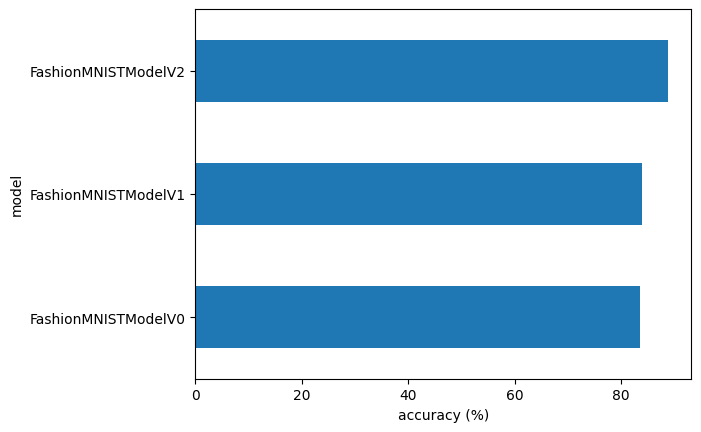

In [43]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") # bar horizontal, for vertical just use `kind=bar`
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [44]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device
                     ):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model ooutputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0) # multi class

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu()) # we need it for matplotlib which only works on cpu

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [45]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9): # randomly sampling 9 sample, labels
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

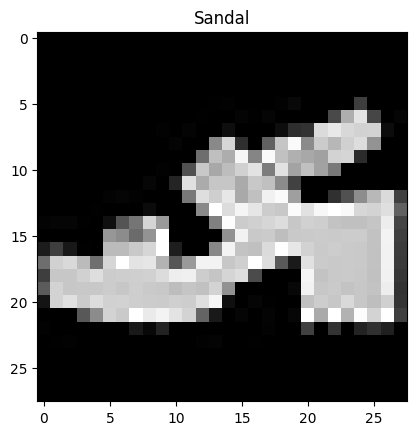

In [46]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [47]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities

pred_classes = pred_probs.argmax(dim=1) # turn prediction prob -> labels
pred_classes, test_labels,pred_probs[:2]

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1],
 tensor([[2.1015e-09, 2.2782e-13, 2.3585e-09, 6.8448e-11, 2.7961e-11, 9.9992e-01,
          4.9036e-08, 3.3447e-09, 1.0695e-06, 7.9089e-05],
         [6.3077e-03, 9.5468e-01, 4.9882e-04, 2.0704e-02, 9.5823e-03, 3.9384e-07,
          8.1771e-03, 3.2881e-07, 1.6805e-05, 3.2120e-05]]))

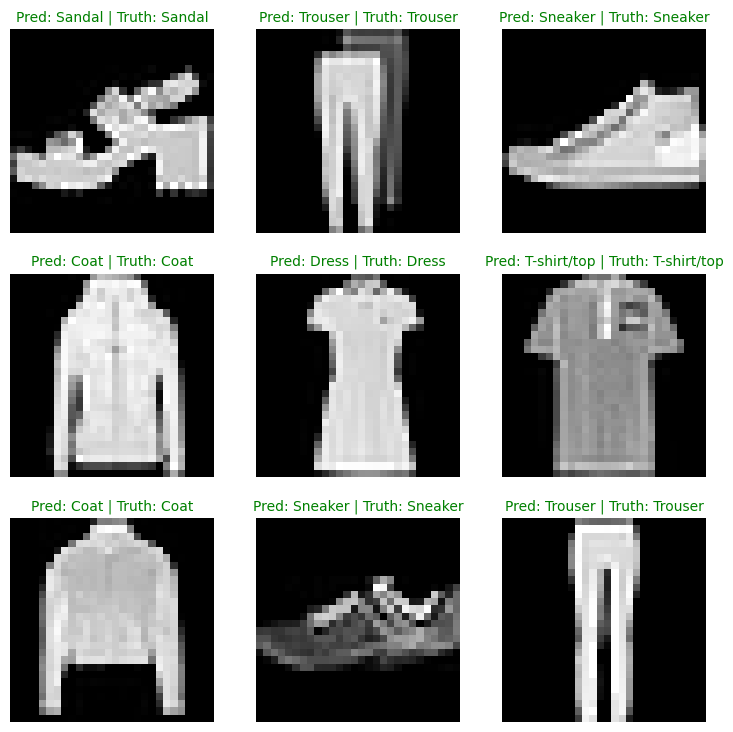

In [48]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, ex: "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if the prediction and truth are the same (correct prediction)
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False) # turn off the axis

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [49]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction label
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation (using matplotlib uses cpu)
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 4])

In [50]:
import mlxtend
mlxtend.__version__

'0.23.1'

In [51]:
# See if required packages are installed if not install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1
mlxtend version: 0.23.1


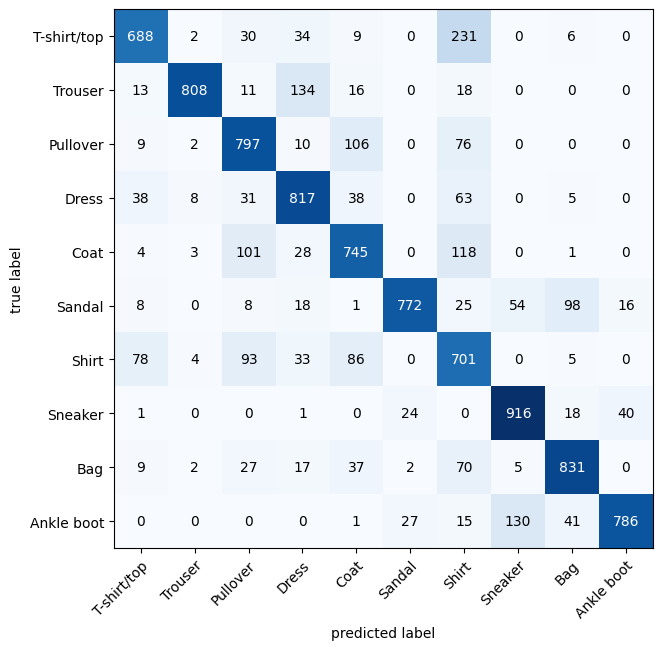

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets # some call it label instead of target
                         )

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib love to work with numpy
    class_names = class_names,
    figsize=(10,7)
)

# 11. Save and load best performing model

In [53]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving the mode to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the mode to: models/03_pytorch_computer_vision_model_2.pth


In [54]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)).to(device)

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<ipython-input-54-b25cb8e3cc12>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [55]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32025471329689026,
  'model_acc': 88.73801916932908},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32025471329689026,
  'model_acc': 88.73801916932908})

In [56]:
# Check if model results are close to each other
torch.isclose(torch.tensor(loaded_model_2_results["model_loss"]),
              torch.tensor(model_2_results["model_loss"]),
              atol=1e-08 # absolute tolerance, saying "hey as long as 8 decimal point (because we set it 1e-08) is the same return true"
              )

tensor(True)